In [3]:
import pandas as pd

import seaborn as sb
sb.set_style('whitegrid')

from matplotlib import pyplot as plt
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [4]:
pk = pd.read_table('C:/Users/siddharth21.TRN/Downloads/pokemon_data.csv', sep=',')
pk

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [4]:
pk.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [6]:
pk.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [7]:
pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 69.6+ KB


In [8]:
x_cols=list(pk.columns)
x_cols

['#',
 'Name',
 'Type 1',
 'Type 2',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Generation',
 'Legendary']

In [9]:
x_cols.remove('#')

In [10]:
x_cols

['Name',
 'Type 1',
 'Type 2',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Generation',
 'Legendary']

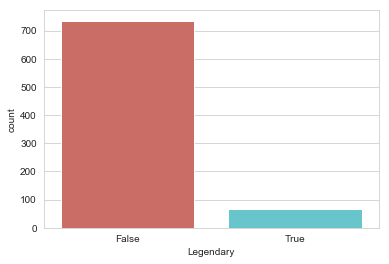

In [12]:
sb.countplot(x='Legendary',data=pk,palette='hls')

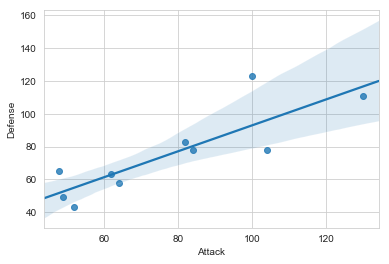

In [14]:
sb.regplot(x='Attack',y='Defense',data=pk.head(10))

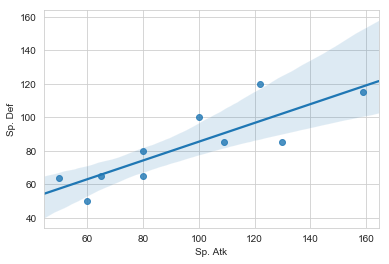

In [15]:
sb.regplot(x='Sp. Atk',y='Sp. Def',data=pk.head(10))

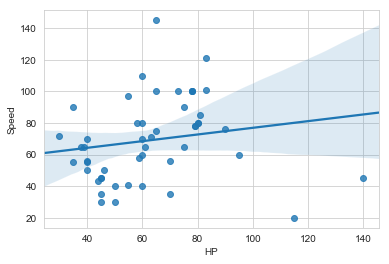

In [29]:
sb.regplot(x='HP',y='Speed',data=pk.head(50))

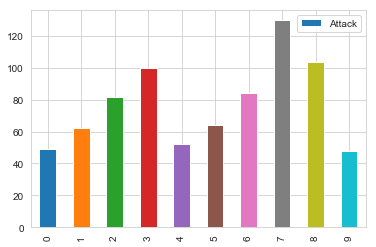

In [24]:
plt.figure()
pk['Attack'].head(10).plot(kind='bar')
plt.xticks(rotation='vertical')
plt.legend()


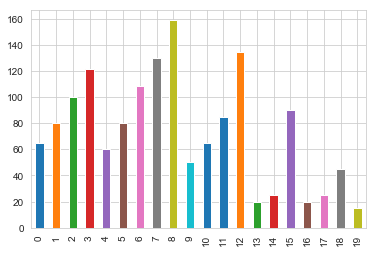

In [41]:
plt.figure()
pk['Sp. Atk'].head(20).plot(kind='bar',label='Special')


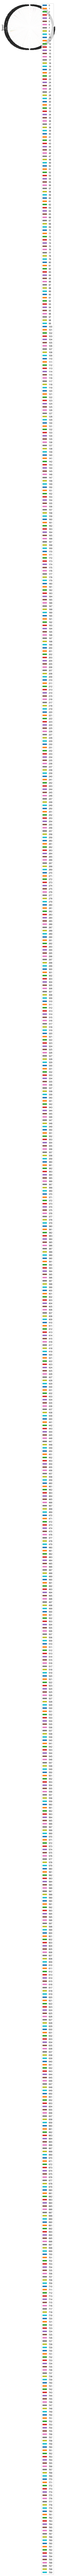

In [32]:
plt.figure()
pk['Speed'].plot(kind='pie')
plt.xticks(rotation='vertical')
plt.legend()

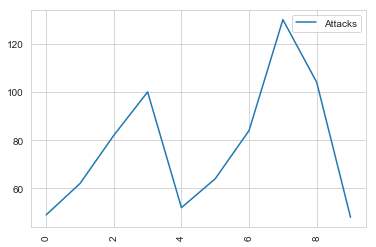

In [27]:
plt.figure()
pk['Attack'].head(10).plot(label='Attacks')
plt.xticks(rotation='vertical')
plt.legend()

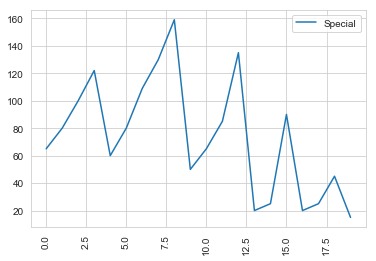

In [30]:
plt.figure()
pk['Sp. Atk'].head(20).plot(label='Special')
plt.xticks(rotation='vertical')
plt.legend()

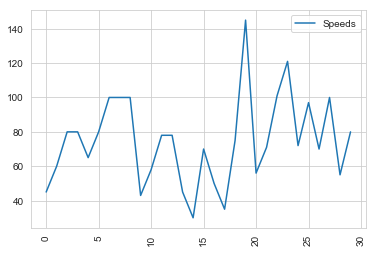

In [42]:
plt.figure()
pk['Speed'].head(30).plot(label='Speeds')
plt.xticks(rotation='vertical')
plt.legend()

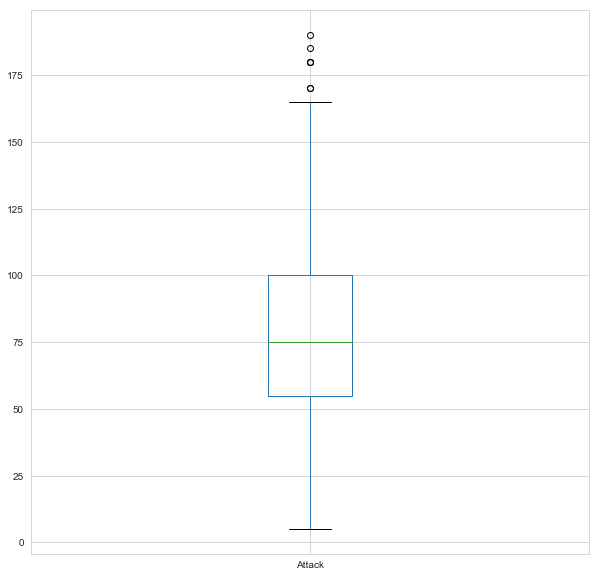

In [18]:
pk['Attack'].plot(kind='box',figsize=(10,10))

In [44]:
pk['Attack'].min()

5

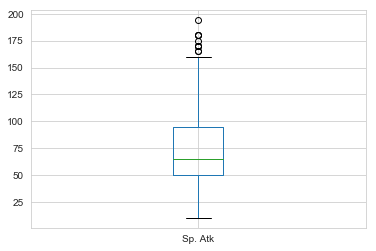

In [45]:
pk["Sp. Atk"].plot(kind='box')

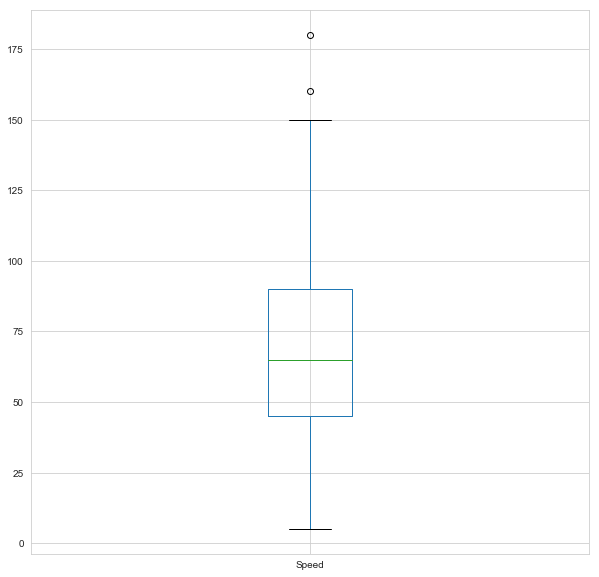

In [24]:
pk["Speed"].plot(kind='box',figsize=(10,10))

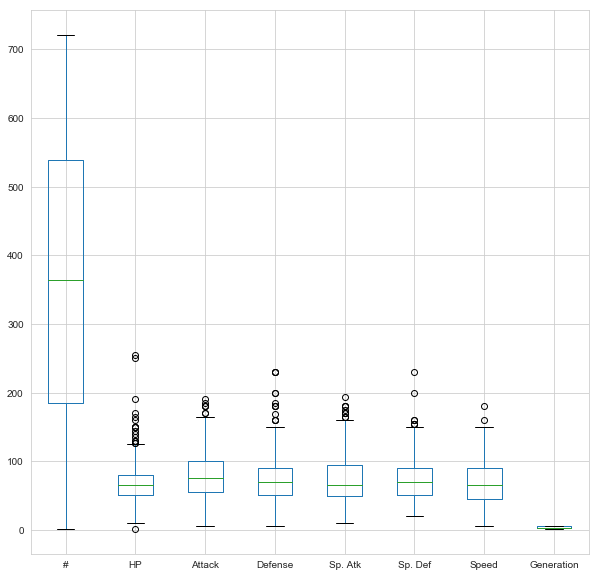

In [26]:
pk.plot(kind='box',figsize=(10,10))